# Exam 2

files needed = ('dogs.csv', 'CPIAUCSL.csv', 'data1.PNG', 'teams.csv', 'players.csv')

Answer all the questions below in this notebook. You should insert as many cells into the notebook as you need. When you are finished, upload your finished notebook to Canvas. 

You may use your notes and the Internet, but you cannot work with others in class.  Remember, jupyter notebooks and python have lots of built in help facilities. 

The best way to use this practice exam is to first study, and then take the exam as you would in class --- with a 1:15 time cap. When you are finished, I would appreciate it if you took the quick two-question survey to give me your thoughts. [Survey link](https://forms.gle/icLs8vEGRSAGhh2K9)    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

## Question 0

1. Create a DataFrame named `time` from the dict below

```python 
data_dict = {'t': ['10-01-2019', '10-02-2019', '10-03-2019'], 'a':[100, 500, 800, ]}
```

2. Set the variable `t` as the index of `time`. The index should be a DatetimeIndex. 

3. Print out `time`

In [2]:
data_dict = {'t': ['10-01-2019', '10-02-2019', '10-03-2019'], 'a':[100, 500, 800, ]}

time = pd.DataFrame(data_dict)

time['t'] = pd.to_datetime(time['t'])
time.set_index('t', inplace=True)

time

,a
t,
2019-10-01,100
2019-10-02,500
2019-10-03,800


3. Confirm that the index is a DatetimeIndex. Print out the index type.

In [3]:
type(time.index)

pandas.core.indexes.datetimes.DatetimeIndex

## Question 1

1. Create a Data Frame from 'dogs.csv'. Name it `dogs`.

In [4]:
dogs = pd.read_csv('dogs.csv')

2. The variables gender and type are coded as integers. Recode them as strings.

   * gender: 0 = male, 1 = female
   * type: 1 = pug, 2 = beagle, 3 = poodle, 5 = samoyed, 7 = vizsla


In [5]:
recode1 = {0:'male', 1:'female'}
recode2 = {1:'pug', 2:'beagle', 3:'poodle', 5:'smoyed', 7:'vizsla'}
dogs['gender'] = dogs['gender'].replace(recode1)
dogs['type'] = dogs['type'].replace(recode2)
dogs

,gender,type,weight_lbs
0,male,smoyed,35
1,female,poodle,40
2,male,vizsla,55
3,female,beagle,15
4,male,beagle,18
5,male,vizsla,62
6,male,vizsla,60
7,female,pug,20


3. The weights are listed in pounds. Convert them to kilograms and save them to a variable named 'weight_kgs'. One pound is 0.45 kilograms.

4. Sort by type and gender. Print out the DataFrame.

In [6]:
dogs['weight_kgs'] = dogs['weight_lbs'] * 0.45
dogs = dogs.sort_values(['type', 'gender'])
dogs

,gender,type,weight_lbs,weight_kgs
3,female,beagle,15,6.75
4,male,beagle,18,8.10
1,female,poodle,40,18.00
7,female,pug,20,9.00
0,male,smoyed,35,15.75
2,male,vizsla,55,24.75
5,male,vizsla,62,27.90
6,male,vizsla,60,27.00


## Question 2

1. Load the file 'CPIAUCSL.csv' into a DataFrame named `cpi`.
2. Set the index to the date
3. Compute the inflation rate, the growth rate of 'CPIAUCSL'. Make sure it is expressed in percentage terms. Save the growth rate in a variable named `inf`.  
4. Print out the first 3 rows of `cpi`.

In [7]:
cpi = pd.read_csv('CPIAUCSL.csv')

cpi['DATE'] = pd.to_datetime(cpi['DATE'])
cpi.set_index('DATE', inplace=True)

cpi['inf'] = cpi['CPIAUCSL'].pct_change()*100

cpi.head(3)

,CPIAUCSL,inf
DATE,,
1947-01-01,21.48,NaN
1947-02-01,21.62,0.651769
1947-03-01,22.00,1.757632


5. Create a line plot of the `inf` variable
    1. Plot only the data from 1/1/2000 to 1/10/2019
    2. Make the data markers stars
    3. Make the line width equal to 3
    2. Make the line and the data markers black
    4. Set the y-axis label to 'percent growth rate' with font size 16
    5. Change the axis tick labels on both axes to have font size 16
    6. Title the figure 'U.S. inflation' with font size 25

C:\Users\kimru\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


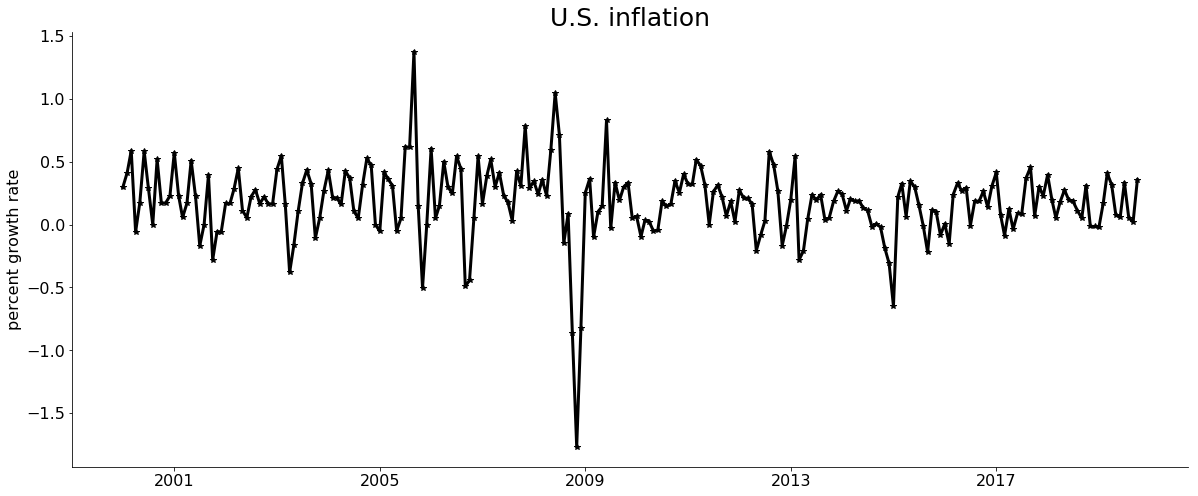

In [8]:
temp  = cpi.loc['2000-01-01':'2019-10-01']

fig, ax = plt.subplots(figsize=(20,8))

ax.plot(temp.index, temp['inf'], color='black', marker = '*', linewidth=3)

ax.set_ylabel('percent growth rate', fontsize=16)
ax.set_title('U.S. inflation', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## Question 3

1. Create a DataFrame from the `state_data` dict below. 
2. Insert a markdown cell, give it a level-3 heading of 'Answer to 3.2', and answer the following question: "Are the data long or wide?"

```python
state_data = {'state':['CA','MI','WI','MN'], 
              'pop':[37,9.8,5.7, 5.3], 
              'size':[163.7, 96.7, 65.5, 86.9], 
              'state bird':['Quail', 'Redbreast Robin', 'American Robin', 'Loon'],
              'gsp':[3018337, 537087,  342470, 374920],
              'great':['no', 'yes', 'yes', 'yes'] 
             }
```

In [9]:
state_data = {'state':['CA','MI','WI','MN'], 
              'pop':[37,9.8,5.7, 5.3], 
              'size':[163.7, 96.7, 65.5, 86.9], 
              'state bird':['Quail', 'Redbreast Robin', 'American Robin', 'Loon'],
              'gsp':[3018337, 537087,  342470, 374920],
              'great':['no', 'yes', 'yes', 'yes'] 
             }

state = pd.DataFrame(state_data)
state

,state,pop,size,state bird,gsp,great
0,CA,37.0,163.7,Quail,3018337,no
1,MI,9.8,96.7,Redbreast Robin,537087,yes
2,WI,5.7,65.5,American Robin,342470,yes
3,MN,5.3,86.9,Loon,374920,yes


### Answer to 3.2

The data are wide. 

3. Arrange the data so that it is a series object with 'state' as the outer row index and the variable names as the inner index. There should be a single column of data. Use any methods you prefer.

4. Sort the index. 

Your data should look like

![alt](data1.PNG)

In [10]:
state.set_index(['state'], inplace=True)
state = state.stack()
state.sort_index(inplace=True)

5. Print out your DataFrame

In [11]:
state

state            
CA     great                      no
       gsp                   3018337
       pop                        37
       size                    163.7
       state bird              Quail
MI     great                     yes
       gsp                    537087
       pop                       9.8
       size                     96.7
       state bird    Redbreast Robin
MN     great                     yes
       gsp                    374920
       pop                       5.3
       size                     86.9
       state bird               Loon
WI     great                     yes
       gsp                    342470
       pop                       5.7
       size                     65.5
       state bird     American Robin
dtype: object

## Question 4

1. Load 'teams.csv' into a DataFrame named `teams`. The file contains data about four BIG10 schools. 
2. Load 'players.csv' into a DataFrame named `players`. The file contains data about football players at four BIG10 schools. 

In [12]:
teams = pd.read_csv('teams.csv')
players = pd.read_csv('players.csv')

3. Merge the two DataFrames. The new DataFrame should contain all the players that are in the players dataset, matched to their team information.  Name the new DataFrame `data`. 

In [13]:
data = pd.merge(left = players, right = teams, left_on = 'TEAM', right_on = 'team', how = 'left' )

4. Make the index of `data` team and name.  
5. Print out the number of rows in `data`. 

In [14]:
data = data.drop('TEAM', axis=1)
data = data.set_index(['team', 'NAME'])
print('data has {0} rows.'.format(data.shape[0]))

data has 51 rows.


6. Sort the index. 
7. Print out the rosters for Minnesota (umn) and Wisconsin (wis). 

In [15]:
data = data.sort_index()
data.loc[['umn', 'wis']]

NUMBER POSITION  WEIGHT CLASS  mascot         city  \
team NAME                                                                       
umn  Brock Annexstad           81       WR     200  Soph  gopher  Minneapolis   
     Bryce Williams            21       RB     205  Soph  gopher  Minneapolis   
     Cam Wiley                  3       RB     205    Fr  gopher  Minneapolis   
     Chris Autman-Bell          7       WR     215  Soph  gopher  Minneapolis   
     Cole Kramer               14       QB     195    Fr  gopher  Minneapolis   
     Jacob Clark               15       QB     220    Fr  gopher  Minneapolis   
     Jason Williamson          28       RB     210    Fr  gopher  Minneapolis   
     Johnny Santaga            16       QB     205  Soph  gopher  Minneapolis   
     Mohamed Ibrahim           24       RB     210  Soph  gopher  Minneapolis   
     Nnamdi Adim-Madumere      89       WR     235    Fr  gopher  Minneapolis   
     Preston Jelen             25       RB     205    Fr  gopher  Minneapolis   
     Rodney Smith               1       RB     210    Sr  gopher  Minneapolis   
     Samuel Pickerign          19       QB     225  Soph  gopher  Minneapolis   
     Shannon Brooks             4       RB     215    Sr  gopher  Minneapolis   
     Tanner Morgan              2       QB     215  Soph  gopher  Minneapolis   
     Treyson Potts             23       RB     200    Fr  gopher  Minneapolis   
     Zack Annexstad             5       QB     220  Soph  gopher  Minneapolis   
wis  Brady Schipper            29       RB     206    Fr  badger      Madison   
     Chase Wolf                 2       QB     196    Fr  badger      Madison   
     Danny Vanden Boom         15       QB     207  Soph  badger      Madison   
     Garrett Groshek           37       RB     220    Jr  badger      Madison   
     Graham Mertz               5       QB     215    Fr  badger      Madison   
     Hunter Johnson            36       RB     220  Soph  badger      Madison   
     Isaac Guerendo            20       RB     213    Fr  badger      Madison   
     Jack Coan                 17       QB     221    Jr  badger      Madison   
     Julius Davis              32       RB     189    Fr  badger      Madison   

                          state  
team NAME                        
umn  Brock Annexstad         MN  
     Bryce Williams          MN  
     Cam Wiley               MN  
     Chris Autman-Bell       MN  
     Cole Kramer             MN  
     Jacob Clark             MN  
     Jason Williamson        MN  
     Johnny Santaga          MN  
     Mohamed Ibrahim         MN  
     Nnamdi Adim-Madumere    MN  
     Preston Jelen           MN  
     Rodney Smith            MN  
     Samuel Pickerign        MN  
     Shannon Brooks          MN  
     Tanner Morgan           MN  
     Treyson Potts           MN  
     Zack Annexstad          MN  
wis  Brady Schipper          WI  
     Chase Wolf              WI  
     Danny Vanden Boom       WI  
     Garrett Groshek         WI  
     Graham Mertz            WI  
     Hunter Johnson          WI  
     Isaac Guerendo          WI  
     Jack Coan               WI  
     Julius Davis            WI

### You are finished!
Upload your completed notebook to Canvas. 

\[Well, not this one, because it is a practice. You could take the [survey](https://forms.gle/icLs8vEGRSAGhh2K9), though, to let me know how it went.\]